In [1]:
from project_code.label_loader import *
from project_code.image_loader import *
from project_code.util import *
from project_code.models import *
from project_code.model_trainer import *
from project_code.dataset import *

In [2]:
file_name_1 = '/Users/fahimtajwar/Academics/cs231/labels_cells_only.xlsx'
file_name_2 = '/Users/fahimtajwar/Academics/cs231/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'cell dies', 'grows sparse', 'grows dense'}
{'cell dies': 0, 'grows sparse': 1, 'grows dense': 2}
tensor([0.0260, 0.0097, 0.0294])


In [3]:
prefix = "/Users/fahimtajwar/Academics/cs231/project_data_well_2/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[ 383 2939  101 2408 1327  159 2414 1853 1265 1611 1849 1389 1608 1806
  702 2082  709  272  374 2239  499 1863 2569  278 2361  255  587 2193
 1811 2899  134 1600  614 1146   75 1900 2986 1100   91  517 1063 1091
 1918 2031  464 1023  286 1943 1848 1176  548 2001  167 2249 1194  307
 1947 1062 1859   54 2640 1060 1303  572  738   17  295 2299 1974 1607
 2502  623 2091 2346  136 1739 1880 1993 1934 1153  456 2337   29 1771
 1018  187 2134 1524 1784 2351 1866  371 1770  242 1791 1516 1992 2417
 2179 1825  391  696 1064 2018 1027 1457 2114  389  321 1772 1736 1006
 1125  677  434 1432 1689  767 1815 2578 1480 2432 1187 2194 1111 2579
 1622 1931 1134 1460 1940 1324 2094 1667 2032 1807 2017 1977 2147 2541
   68  183 1804 1672  755 2253 1714 2424 2199 2046 1779  257 1569  202
 2397 1998 2164  750 2800  455 2853 1614 2388 2291 2955 1801 2920 2011
  561 2023 1794  723 2122  542 2881 2971  579 1122 2124 1775  418 2107
  111 2857  381 2137 1685  518  100 1037  419 1879   52  450  683 1016
  

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
logistic_model = LogisticRegression(input_size, num_classes)

In [8]:
model = Model(logistic_model, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1536
Epoch: [2/30], Loss: 1.1159
Epoch: [3/30], Loss: 1.1095
Epoch: [4/30], Loss: 1.0955
Epoch: [5/30], Loss: 1.0686
Epoch: [6/30], Loss: 1.0824
Epoch: [7/30], Loss: 1.0731
Epoch: [8/30], Loss: 1.0664
Epoch: [9/30], Loss: 1.0525
Epoch: [10/30], Loss: 1.0737
Epoch: [11/30], Loss: 1.0235
Epoch: [12/30], Loss: 1.0637
Epoch: [13/30], Loss: 1.0568
Epoch: [14/30], Loss: 1.0398
Epoch: [15/30], Loss: 1.0535
Epoch: [16/30], Loss: 1.0259
Epoch: [17/30], Loss: 1.0333
Epoch: [18/30], Loss: 1.0476
Epoch: [19/30], Loss: 1.0323
Epoch: [20/30], Loss: 1.0179
Epoch: [21/30], Loss: 1.0386
Epoch: [22/30], Loss: 1.0217
Epoch: [23/30], Loss: 1.0223
Epoch: [24/30], Loss: 1.0129
Epoch: [25/30], Loss: 1.0051
Epoch: [26/30], Loss: 1.0105
Epoch: [27/30], Loss: 1.0331
Epoch: [28/30], Loss: 1.0315
Epoch: [29/30], Loss: 1.0089
Epoch: [30/30], Loss: 1.0279
Training done!


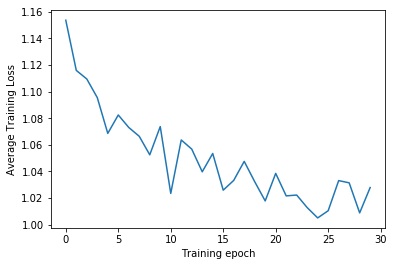

accuracy : 46.000000

{1: 160, 0: 61, 2: 59}


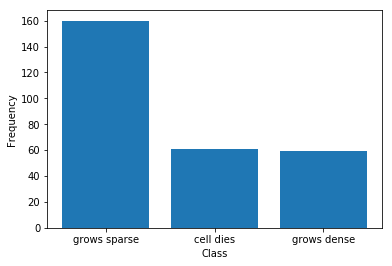

{'grows sparse': 63, 'cell dies': 30, 'grows dense': 38}


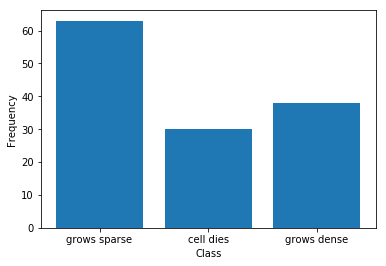

In [9]:
model.train()

accuracy : 40.000000

{0: 8, 2: 2, 1: 25}


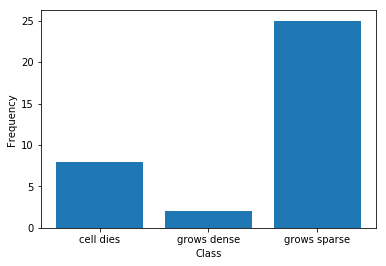

{'cell dies': 3, 'grows dense': 2, 'grows sparse': 9}


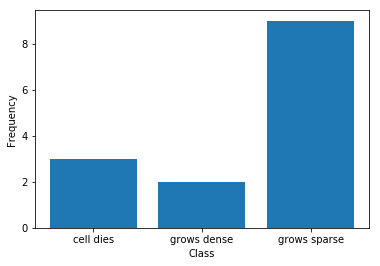

In [10]:
model.test(validation_loader)

accuracy : 34.000000

{1: 21, 2: 7, 0: 7}


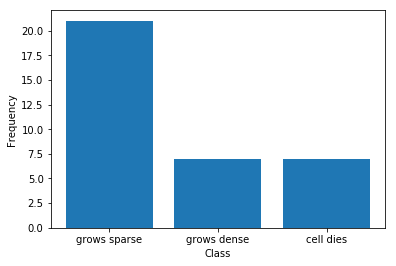

{'grows sparse': 6, 'grows dense': 4, 'cell dies': 2}


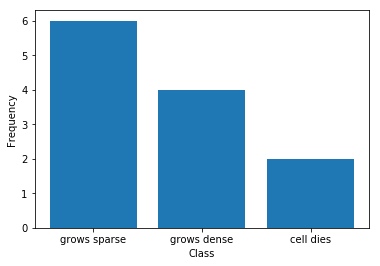

In [11]:
model.test(test_loader)